# Optimizing Gold Smelting Processes: A Machine Learning Approach for Zyfra
Zyfra, a company focused on creating efficiency solutions for heavy industry, needs to optimize the efficiency of its gold smelting process.  A machine learning model can accurately predict the amount of gold extracted from ore to improve the operational efficiency of gold extraction and purification.  This project will rely on extraction and purification data.  First, I will clean and prepare this data for use in building a machine learning model.  Next, I will analyze the data to identify patterns and particular features that may influence the model's accuracy.  Finally, I will train a model to make reliable predictions of gold recovery processes.
## Data Preparation
This project will rely on pandas for data manipulation, numpy, matplotlib, and seaborn for visualizing data, and scikit-learn for building and training the model.

In [180]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor as mor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, make_scorer as ms
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score as cvs, KFold, RandomizedSearchCV

### Opening and Examining Data Sets

In [181]:
train_set = pd.read_csv('/datasets/gold_recovery_train.csv')
test_set = pd.read_csv('/datasets/gold_recovery_test.csv')
full_set = pd.read_csv('/datasets/gold_recovery_full.csv')

In [182]:
train_set

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [183]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [184]:
train_set.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [185]:
test_set

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [186]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [187]:
test_set.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [188]:
full_set

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [189]:
full_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [190]:
full_set.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


The full dataset contains nearly 23000 data points indexed by date and time with measurements taken of 86 parameters measured throughout processing.  The majority of data points are intact, though some are null.  This data is split between the training and test sets at a ratio of 3:1.  The training set contains all 86 parameters, but the test set contains only 52 parameters because some parameters were measured and/or calculated much later.  Additionally, the test set does not contain targets.  The data was sent directly from the warehouse, so it will need preprocessing.  Due to the incredible size of the dataset, I will only focus on parameters necessary for this project's calculations.

### Checking Recovery Calculations
First, using the training set, I will verify that recovery is calculated correctly using the rougher.output.recovery feature and determining the MAE between my calculations and the feature values.  I will first need to address null values in the necessary columns.

In [191]:
actual_recovery = train_set['rougher.output.recovery']
actual_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

In [192]:
actual_recovery.isna().sum()

2573

Since there are a considerable number of nan values, I will reinitiate this variable and drop nan values from all of the other variables needed to calculate recovery.

In [193]:
train_set = train_set.dropna(subset=['rougher.output.recovery'])
feed = train_set['rougher.input.feed_au']
concentrate = train_set['rougher.output.concentrate_au']
tail = train_set['rougher.output.tail_au']
actual_recovery = train_set['rougher.output.recovery']

In [194]:
print(feed.isna().sum())
print(concentrate.isna().sum())
print(tail.isna().sum())
print(actual_recovery.isna().sum())

0
0
0
0


Nan values removed.  Now, I will calculate recovery.

In [195]:
calc_recovery = ((concentrate * (feed - tail)) / (feed * (concentrate - tail)) * 100)
calc_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [196]:
actual_recovery, calc_recovery = actual_recovery.align(calc_recovery, join='inner')
print(len(actual_recovery), len(calc_recovery))

14287 14287


In [197]:
mae = mean_absolute_error(actual_recovery, calc_recovery)
mae

9.303415616264301e-15

The MAE of Actual Recovery vs Calculated Recovery is extremely close to zero.  Everything seems to be in order.

### Analyzing Features Not in Test Set
As previously noted, the test set contains only 52 parameters because some parameters were measured and/or calculated much later.  Before proceeding, it would be helpful to have a precise list of which parameters are not in the test set vs the training set.

In [198]:
missing_params = set(train_set.columns) - set(test_set.columns)
for param in missing_params:
    print(f'Parameter: {param}, Type: {train_set[param].dtype}')

Parameter: primary_cleaner.output.tail_sol, Type: float64
Parameter: rougher.output.tail_sol, Type: float64
Parameter: final.output.tail_au, Type: float64
Parameter: primary_cleaner.output.tail_au, Type: float64
Parameter: rougher.output.tail_au, Type: float64
Parameter: final.output.concentrate_au, Type: float64
Parameter: final.output.concentrate_pb, Type: float64
Parameter: rougher.output.tail_ag, Type: float64
Parameter: rougher.output.tail_pb, Type: float64
Parameter: final.output.tail_pb, Type: float64
Parameter: rougher.calculation.floatbank10_sulfate_to_au_feed, Type: float64
Parameter: rougher.output.recovery, Type: float64
Parameter: primary_cleaner.output.concentrate_au, Type: float64
Parameter: final.output.tail_sol, Type: float64
Parameter: secondary_cleaner.output.tail_pb, Type: float64
Parameter: final.output.concentrate_ag, Type: float64
Parameter: secondary_cleaner.output.tail_sol, Type: float64
Parameter: rougher.calculation.sulfate_to_au_concentrate, Type: float64
Pa

The primary difference between the training set and the test set is that the test set does not contain output parameters, only those parameters having to do with input, calculation, and state.  Given we will ultimately need to make predictions without those additional 34 features included, I will go ahead and drop them from the training set with the exception of the targets.

In [199]:
common_features = list(set(train_set.columns) & set(test_set.columns))
targets = ['rougher.output.recovery', 'final.output.recovery'] 
common_features = [col for col in common_features if col not in targets]
len(common_features)

53

In [200]:
train_set = train_set[common_features + targets]
test_set = test_set[common_features]
print(set(train_set.columns) - set(test_set.columns))

{'rougher.output.recovery', 'final.output.recovery'}


### Data Preprocessing
Having investigated the key differences between the data sets, I will now perform preprocessing steps to ensure the data is ready for analysis and modeling.  First, I will verify there are no fully duplicate rows.

In [201]:
train_set.duplicated().sum()

0

In [202]:
test_set.duplicated().sum()

0

There are no fully duplicate rows.  I will also verify that the parameters for each dataset are all a unique record of information by checking that no timestamps are duplicates.

In [203]:
train_set.duplicated(['date']).sum()

0

In [204]:
test_set.duplicated(['date']).sum()

0

There are no duplicated or contradictory records of information.  I will now clean up the data by checking for null values and replacing them with the last valid observation so the data is as accurate as possible despite occasional equipment malfunctions.

In [205]:
train_set.isnull().sum()

rougher.state.floatbank10_f_air                 0
primary_cleaner.input.depressant               38
rougher.input.floatbank10_sulfate              31
primary_cleaner.state.floatbank8_c_level        1
rougher.state.floatbank10_a_air                 1
secondary_cleaner.state.floatbank3_a_level      1
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_e_air               438
rougher.input.feed_sol                         96
secondary_cleaner.state.floatbank2_a_air      219
secondary_cleaner.state.floatbank3_b_air        1
secondary_cleaner.state.floatbank3_b_level      1
rougher.input.floatbank10_xanthate              9
primary_cleaner.input.sulfate                  26
rougher.input.floatbank11_xanthate            434
rougher.input.feed_size                       149
rougher.state.floatbank10_a_level               1
primary_cleaner.input.feed_size                 0
date                                            0
secondary_cleaner.state.floatbank5_a_level      1


In [206]:
train_set = train_set.copy()
train_set.fillna(method='ffill', inplace=True)

In [207]:
train_set.isnull().sum()

rougher.state.floatbank10_f_air               0
primary_cleaner.input.depressant              0
rougher.input.floatbank10_sulfate             0
primary_cleaner.state.floatbank8_c_level      0
rougher.state.floatbank10_a_air               0
secondary_cleaner.state.floatbank3_a_level    0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
rougher.input.feed_sol                        0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank3_b_air      0
secondary_cleaner.state.floatbank3_b_level    0
rougher.input.floatbank10_xanthate            0
primary_cleaner.input.sulfate                 0
rougher.input.floatbank11_xanthate            0
rougher.input.feed_size                       0
rougher.state.floatbank10_a_level             0
primary_cleaner.input.feed_size               0
date                                          0
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank6_a_lev

In [208]:
test_set.isnull().sum()

rougher.state.floatbank10_f_air                17
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.state.floatbank8_c_level       16
rougher.state.floatbank10_a_air                17
secondary_cleaner.state.floatbank3_a_level     16
rougher.state.floatbank10_e_level              16
rougher.state.floatbank10_e_air                17
rougher.input.feed_sol                         67
secondary_cleaner.state.floatbank2_a_air       20
secondary_cleaner.state.floatbank3_b_air       16
secondary_cleaner.state.floatbank3_b_level     16
rougher.input.floatbank10_xanthate            123
primary_cleaner.input.sulfate                 302
rougher.input.floatbank11_xanthate            353
rougher.input.feed_size                        22
rougher.state.floatbank10_a_level              16
primary_cleaner.input.feed_size                 0
date                                            0
secondary_cleaner.state.floatbank5_a_level     16


In [209]:
test_set = test_set.copy()
test_set.fillna(method='ffill', inplace=True)

In [210]:
test_set.isnull().sum()

rougher.state.floatbank10_f_air               0
primary_cleaner.input.depressant              0
rougher.input.floatbank10_sulfate             0
primary_cleaner.state.floatbank8_c_level      0
rougher.state.floatbank10_a_air               0
secondary_cleaner.state.floatbank3_a_level    0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
rougher.input.feed_sol                        0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank3_b_air      0
secondary_cleaner.state.floatbank3_b_level    0
rougher.input.floatbank10_xanthate            0
primary_cleaner.input.sulfate                 0
rougher.input.floatbank11_xanthate            0
rougher.input.feed_size                       0
rougher.state.floatbank10_a_level             0
primary_cleaner.input.feed_size               0
date                                          0
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank6_a_lev

Missing values have been replaced with last valid observation.  The data is ready.

## Data Analysis
Before building a model, I will explore the data a bit further to better understand how it reflects the gold smelting process, beginning with how the concentrations of metals change depending on the purification stage.

### Metal Concentration vs Purification Stage

In [211]:
metal_conc_cols = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

metal_conc_data = full_set[metal_conc_cols]
melt_conc_data = metal_conc_data.melt(var_name='stage_metal', value_name='conc')
melt_conc_data[['stage', 'metal']] = melt_conc_data['stage_metal'].str.extract(r'(\w+)\.output\.concentrate_(\w+)')
melt_conc_data.drop('stage_metal', axis=1, inplace=True)

melt_conc_data

,conc,stage,metal
0,11.500771,rougher,ag
1,11.615865,rougher,ag
2,11.695753,rougher,ag
3,11.915047,rougher,ag
4,12.411054,rougher,ag
...,...,...,...
204439,46.713954,final,au
204440,46.866780,final,au
204441,46.795691,final,au
204442,46.408188,final,au


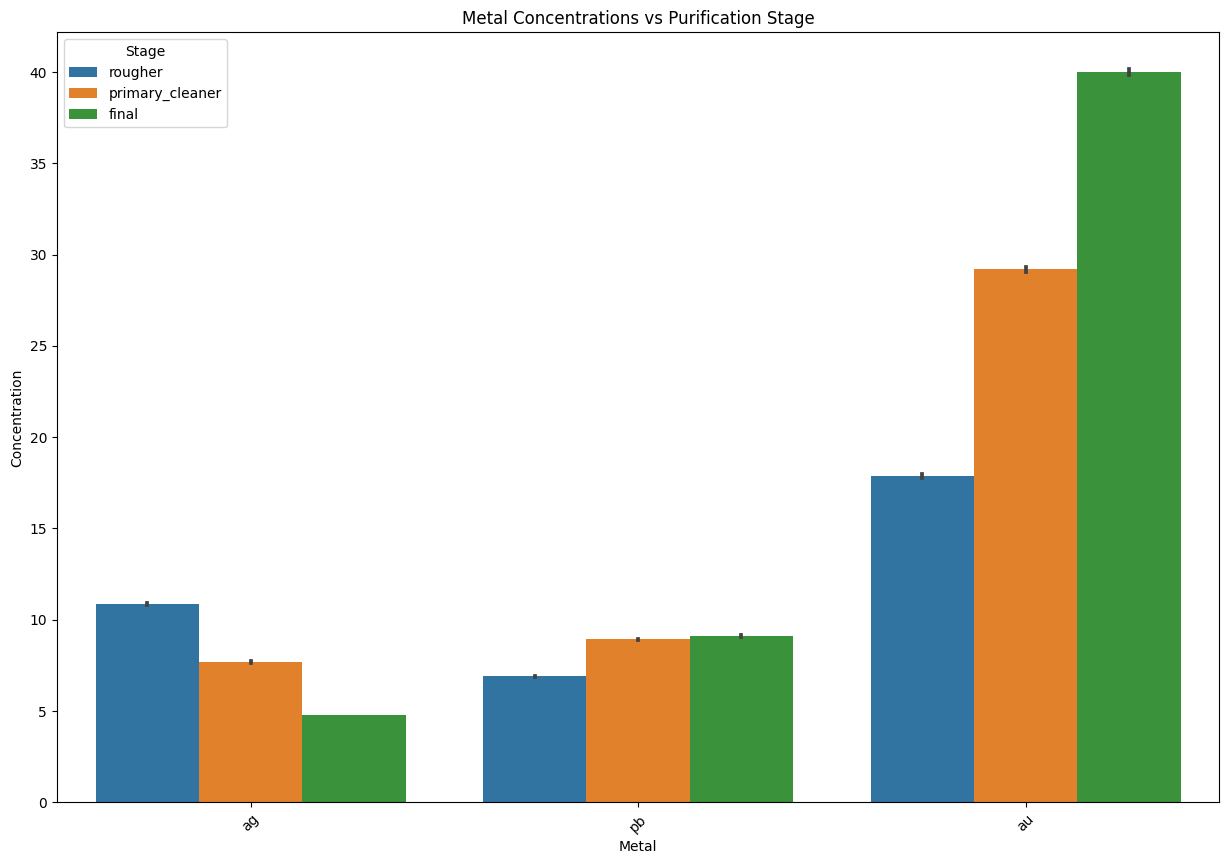

In [212]:
plt.figure(figsize=(15, 10))
sns.barplot(x='metal', y='conc', hue='stage', data=melt_conc_data)
plt.title('Metal Concentrations vs Purification Stage')
plt.xlabel('Metal')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.legend(title='Stage')
plt.show()

As we can see from the graph, the concentration of Silver (ag) decreases throughout the purification process, Lead (pb) slightly increases, and Gold (au) increases substantially, as intended.

### Feed Particle Size Distribution: Training vs Test Set
The feed particle size distributions need to be roughly the same for the model to work as intended.  Therefore, I will confirm that the distributions are similar before building the model.

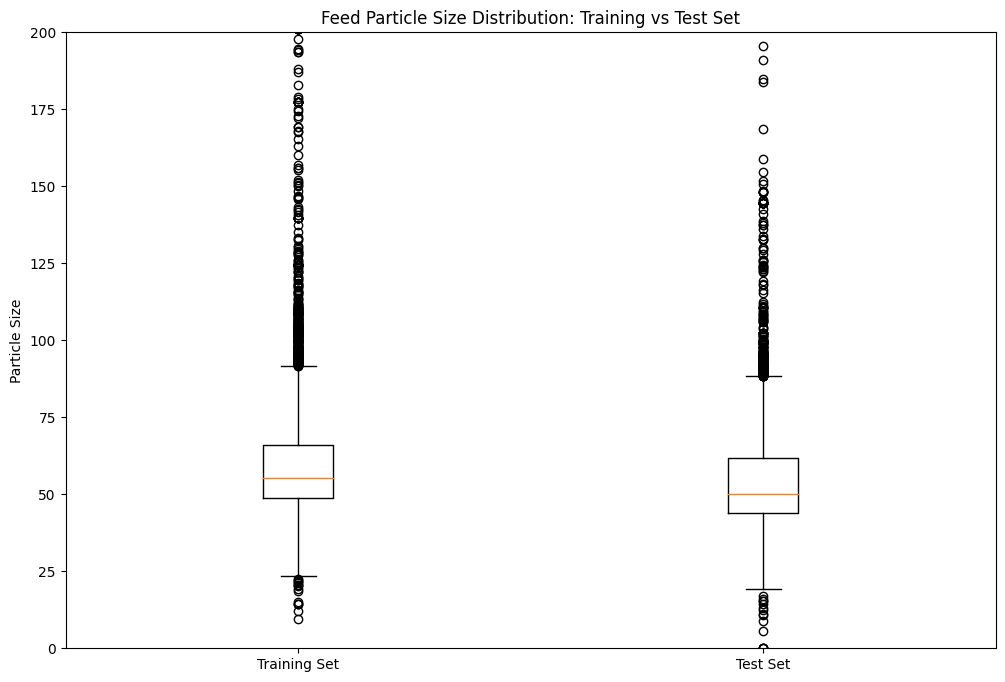

In [214]:
feed_size_train = train_set['rougher.input.feed_size']
feed_size_test = test_set['rougher.input.feed_size']

plt.figure(figsize=(12, 8))
plt.boxplot([feed_size_train, feed_size_test], labels=['Training Set', 'Test Set'])
plt.title('Feed Particle Size Distribution: Training vs Test Set')
plt.ylabel('Particle Size')
plt.ylim(0, 200)
plt.show()

In [215]:
feed_size_train.describe()

count    14287.000000
mean        60.179089
std         22.985089
min          9.659576
25%         48.932377
50%         55.251872
75%         65.976914
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [216]:
feed_size_test.describe()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct. But, again, it's better to use histograms for tasks of this type. The best way is to plot two normalized histograms on the same graph with different colors. If you do it, you will see why it's better:)
  
</div>

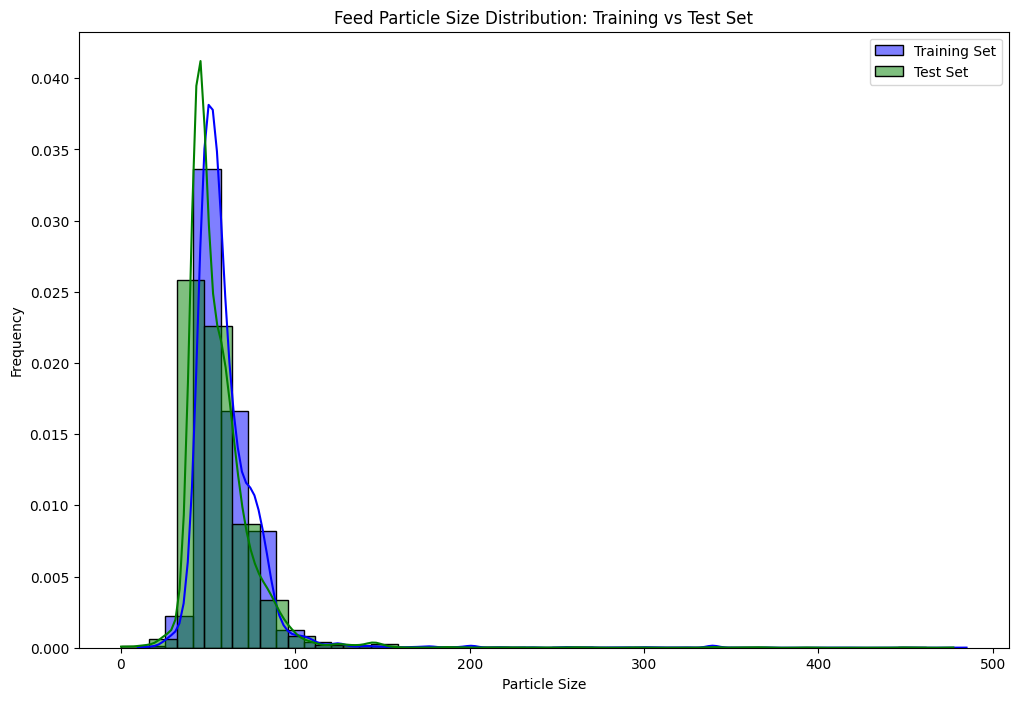

In [217]:
plt.figure(figsize=(12, 8))
sns.histplot(feed_size_train, bins=30, color='blue', label='Training Set', stat='density', kde=True, alpha=0.5)
sns.histplot(feed_size_test, bins=30, color='green', label='Test Set', stat='density', kde=True, alpha=0.5)
plt.title('Feed Particle Size Distribution: Training vs Test Set')
plt.xlabel('Particle Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The training and test sets are similar enough in terms of distribution that they can be used for modelling.  The training set has a mean of 59 and median of 54 while the test set has a mean of 56 and a median of 50 (all rounded to the nearest integer).

### Concentrations of All Substances Across Stages
This section will verify that there are no abnormal values in the concentration data for each substance across stages and between the training and test set.

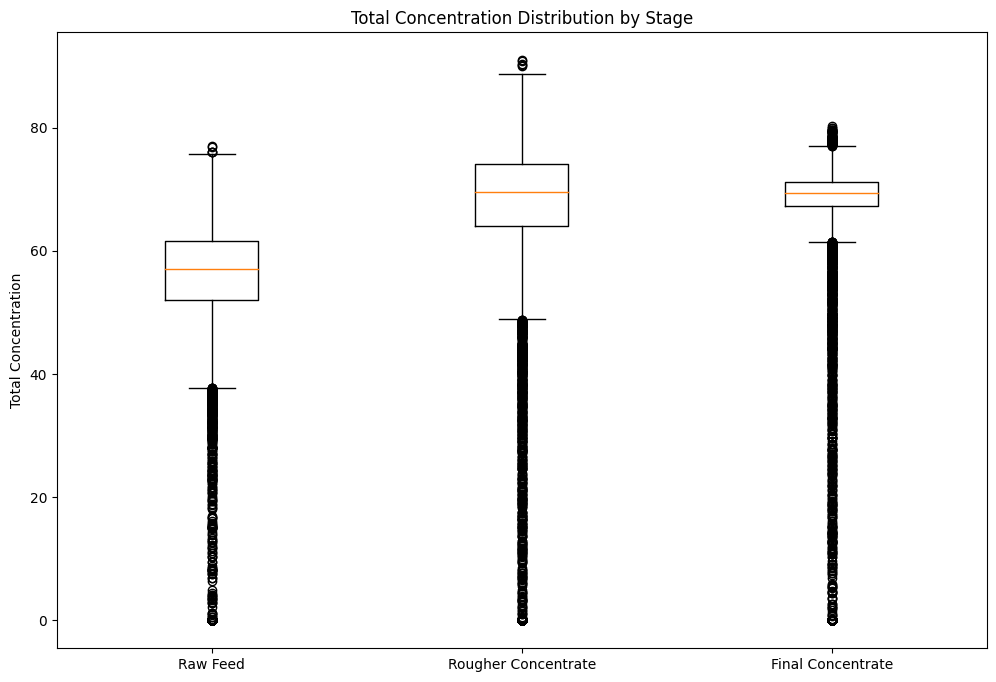

In [218]:
conc_cols_all = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 
                 'rougher.input.feed_au', 'rougher.output.concentrate_ag', 
                 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 
                 'rougher.output.concentrate_au', 'final.output.concentrate_ag', 
                 'final.output.concentrate_pb', 'final.output.concentrate_sol', 
                 'final.output.concentrate_au']
full_set['total_feed'] = full_set['rougher.input.feed_ag'] + full_set['rougher.input.feed_pb'] + full_set['rougher.input.feed_sol'] + full_set['rougher.input.feed_au']
full_set['total_rougher'] = full_set['rougher.output.concentrate_ag'] + full_set['rougher.output.concentrate_pb'] + full_set['rougher.output.concentrate_sol'] + full_set['rougher.output.concentrate_au']
full_set['total_final'] = full_set['final.output.concentrate_ag'] + full_set['final.output.concentrate_pb'] + full_set['final.output.concentrate_sol'] + full_set['final.output.concentrate_au']
full_set_clean = full_set[['total_feed', 'total_rougher', 'total_final']].dropna()

plt.figure(figsize=(12, 8))
plt.boxplot([full_set_clean['total_feed'], full_set_clean['total_rougher'], full_set_clean['total_final']], labels=['Raw Feed', 'Rougher Concentrate', 'Final Concentrate'])
plt.title('Total Concentration Distribution by Stage')
plt.ylabel('Total Concentration')
plt.show()

In [219]:
full_set_clean.describe()

,total_feed,total_rougher,total_final
count,21901.000000,21901.000000,21901.000000
mean,52.417291,62.023232,62.837375
std,17.648492,23.140034,20.308946
min,0.000000,0.000000,0.000000
25%,52.062695,64.032223,67.278403
50%,57.029380,69.634137,69.330445
75%,61.599315,74.147314,71.190990
max,76.978947,90.964431,80.210644


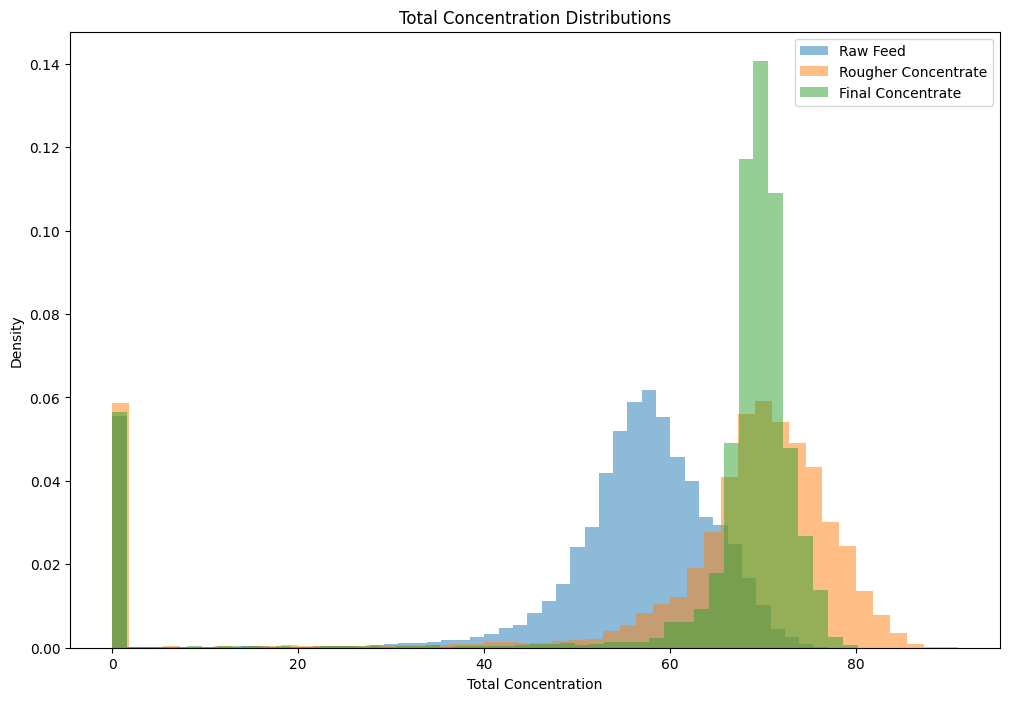

In [220]:
plt.figure(figsize=(12,8))

plt.hist(full_set['total_feed'], bins=50, alpha=0.5, label='Raw Feed', density=True)
plt.hist(full_set['total_rougher'], bins=50, alpha=0.5, label='Rougher Concentrate', density=True)
plt.hist(full_set['total_final'], bins=50, alpha=0.5, label='Final Concentrate', density=True)

plt.title('Total Concentration Distributions')
plt.xlabel('Total Concentration')
plt.ylabel('Density')
plt.legend()
plt.show()

While the boxplot indicates a sizable number of outliers, the histogram reveals a surprisingly large density of outliers of approximately 0.  This is most likely an error in concentrate calculation perhaps due to sensor malfunction given that it is unlikely a load of ore is would not contain any gold whatsoever or an infintismally small amount.  To improve the quality and reliability of the data, I will remove extreme outliers from the training set and the raw feed values by dropping rows that are significantly smaller or greater than the majority of the data, as calculated using interquartile range.

In [221]:
train_set['total_feed'] = train_set['rougher.input.feed_ag'] + train_set['rougher.input.feed_pb'] + train_set['rougher.input.feed_sol'] + train_set['rougher.input.feed_au']
test_set['total_feed'] = test_set['rougher.input.feed_ag'] + test_set['rougher.input.feed_pb'] + test_set['rougher.input.feed_sol'] + test_set['rougher.input.feed_au']

def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

train_feed_outliers = detect_outliers(train_set['total_feed'])
test_feed_outliers = detect_outliers(test_set['total_feed'])

In [222]:
clean_train_set = train_set[~train_set.index.isin(train_feed_outliers.index)]
clean_test_set = test_set[~test_set.index.isin(test_feed_outliers.index)]
print(f"Clean train set shape: {clean_train_set.shape}")
print(f"Clean test set shape: {clean_test_set.shape}")

Clean train set shape: (13904, 56)
Clean test set shape: (5332, 54)


Removing extreme outliers has moderately reduced the available data.  I will now re-create the distribution visuals from above.

/tmp/ipykernel_33/1877768352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_train_set['total_feed'] = clean_train_set['rougher.input.feed_ag'] + clean_train_set['rougher.input.feed_pb'] + clean_train_set['rougher.input.feed_sol'] + clean_train_set['rougher.input.feed_au']
/tmp/ipykernel_33/1877768352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_test_set['total_feed'] = clean_test_set['rougher.input.feed_ag'] + clean_test_set['rougher.input.feed_pb'] + clean_test_set['rougher.input.fe

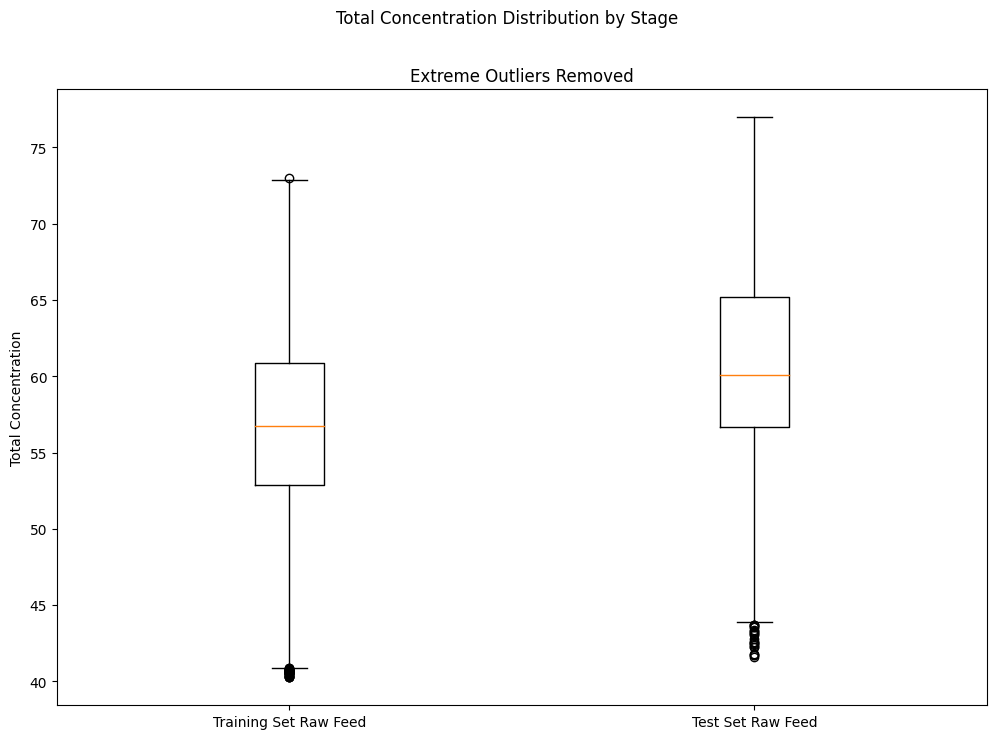

In [223]:
clean_train_set['total_feed'] = clean_train_set['rougher.input.feed_ag'] + clean_train_set['rougher.input.feed_pb'] + clean_train_set['rougher.input.feed_sol'] + clean_train_set['rougher.input.feed_au']
clean_test_set['total_feed'] = clean_test_set['rougher.input.feed_ag'] + clean_test_set['rougher.input.feed_pb'] + clean_test_set['rougher.input.feed_sol'] + clean_test_set['rougher.input.feed_au']
clean_sets = [clean_train_set['total_feed'], clean_test_set['total_feed']]
              
plt.figure(figsize=(12, 8))
plt.boxplot(clean_sets, labels=['Training Set Raw Feed', 'Test Set Raw Feed'])
plt.suptitle('Total Concentration Distribution by Stage')
plt.title('Extreme Outliers Removed')
plt.ylabel('Total Concentration')
plt.show()

These distributions are much more reliable and the progression between stages in the training set is as expected.  I will also replot the histogram.

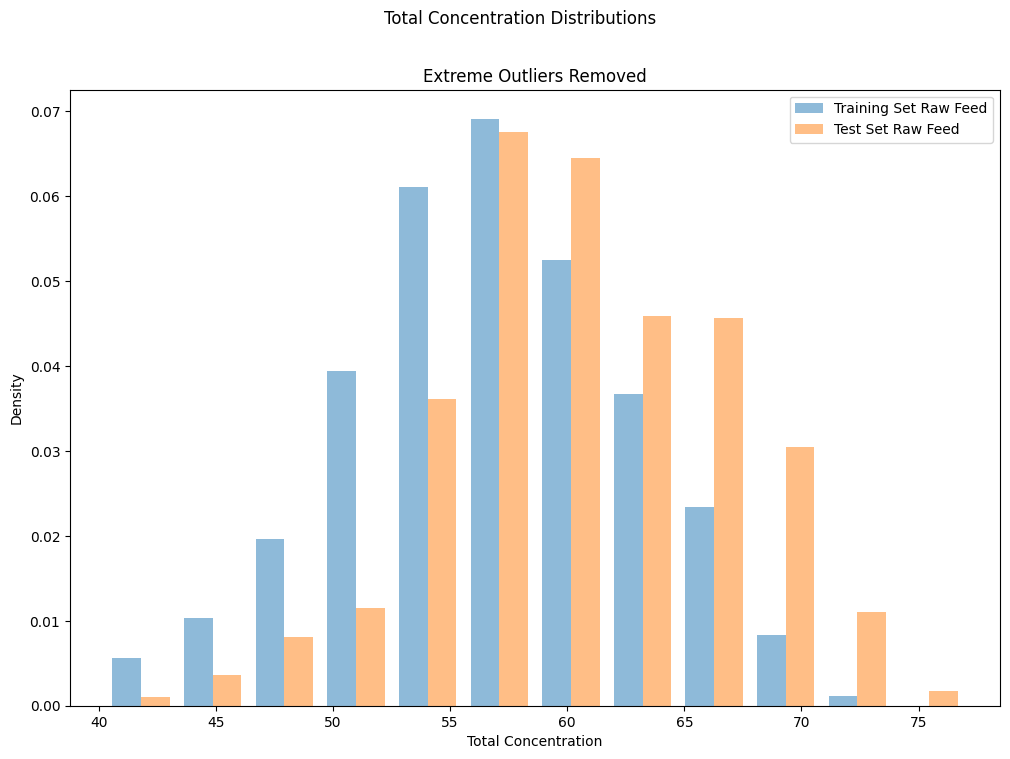

In [224]:
plt.figure(figsize=(12,8))
plt.hist(clean_sets, bins=12, alpha=0.5, density=True)
plt.suptitle('Total Concentration Distributions')
plt.title('Extreme Outliers Removed')
plt.xlabel('Total Concentration')
plt.ylabel('Density')
plt.legend(['Training Set Raw Feed', 'Test Set Raw Feed'])
plt.show()

As with the boxplot, the histogram confirms that the cleaned, focused dataset has normal distribution that will allow for better, more accurate modeling.

## Model
Now that the data is adjusted and more readily usable, I will construct a model to calculate a unique evaluation metric: sMAPE--symmetric Mean Absolute Percentage Error.  sMAPE is similar to Mean Absolute Error, but expressed in relative values instead of absolute ones.  The symmetricity will take into equal account the scale of both the target and the prediction.  The model will rely on a final sMAPE value consisting of 25% of the rougher sMAPE's value and 75% of the final sMAPE's value when applied to the test set.
### Function for Calculating sMAPE
First, I will create a function for calculating the sMAPE and weighted sMAPE as no existing function is available.  I will then initiate the smape scorer for cross-validation with multiple checks to ensure it functions later on with most data that I could possibly feed to it.

In [225]:
def final_smape(y_targ, y_pred):
    epsilon = 1e-10
    smape_rougher = np.mean(2 * np.abs(y_targ[:, 0] - y_pred[:, 0]) / (np.abs(y_targ[:, 0]) + np.abs(y_pred[:, 0]) + epsilon))
    smape_final = np.mean(2 * np.abs(y_targ[:, 1] - y_pred[:, 1]) / (np.abs(y_targ[:, 1]) + np.abs(y_pred[:, 1]) + epsilon))
    return 0.25 * smape_rougher + 0.75 * smape_final

In [226]:
smape_scorer = ms(final_smape, greater_is_better=False)

In [227]:
kf = KFold(n_splits=5, shuffle=True, random_state=21)

### Model Training
Next, I need to select the best model for our data set.  I will train a Random Forest and a Linear Regression model.  Before running and evaluating each model, I first need to define variables that will be used throughout.

In [228]:
#defining variables for train_set
train_set = clean_train_set.drop(['date'], axis=1)
targets = train_set[['rougher.output.recovery', 'final.output.recovery']].to_numpy()
train_features = train_set.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

#defining variables for test_set
test_features = clean_test_set.drop(['date'], axis=1)
test_targets = pd.merge(clean_test_set, full_set[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')
test_targets = test_targets[['rougher.output.recovery', 'final.output.recovery']]

In [229]:
#cleaning up newly defined test_targets
test_targ_means = np.nanmean(test_targets)
zero_2_nan = test_targets.replace(0, np.nan)
test_targets = test_targets.fillna(method='ffill').to_numpy()

In [230]:
print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)
print("Targets only in train set:", set(train_set.columns) - set(test_set.columns))
print("Targets shape:", targets.shape, "and type:", type(targets))
print("Test targets shape:", test_targets.shape)

Train set shape: (13904, 55)
Test set shape: (5856, 54)
Targets only in train set: {'rougher.output.recovery', 'final.output.recovery'}
Targets shape: (13904, 2) and type: <class 'numpy.ndarray'>
Test targets shape: (5332, 2)


In [231]:
#establishing constant variables
targets_mean = np.nanmean(targets, axis=0)
constant_pred = np.full_like(targets, targets_mean)
constant_pred

array([[82.79316788, 66.766245  ],
       [82.79316788, 66.766245  ],
       [82.79316788, 66.766245  ],
       ...,
       [82.79316788, 66.766245  ],
       [82.79316788, 66.766245  ],
       [82.79316788, 66.766245  ]])

In [232]:
train_smape = final_smape(targets, constant_pred)

print("Final sMAPE of the Constant Model Using Training Set:", train_smape)

Final sMAPE of the Constant Model Using Training Set: 0.11044578903205361


Everything appears to have worked correctly as the train_set has two more columns than the test set due to the inclusion of the targets, which is the only difference between the sets.  Additionally, test targets have been defined for use in final model evaluation.

Predicting the amount of gold recovered is a regression problem.  Therefore, I will train and compare the sMAPE value of a Random Forest and Linear Regression model to determine the best model to use.  Additionally, I have calculated the Final sMAPE of the constant model using the training set to give a baseline for comparing with the two models.
#### Random Forest

In [ ]:
param_grid = {
    'estimator__n_estimators': [10, 15, 20, 25, 50, 100],
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=21)

multi_rf_model = mor(rf_model)

kf = KFold(n_splits=5, shuffle=True, random_state=21)

random_search = RandomizedSearchCV(estimator=multi_rf_model, param_distributions=param_grid, 
                                   n_iter=20, scoring=smape_scorer, cv=kf, random_state=21, n_jobs=-1, verbose=2)

random_search.fit(train_features, targets)

print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best sMAPE score: {-random_search.best_score_}")

Optimal hyperparameters for the model are 100 estimators, a minimum samples split of 2, minimum samples leaf of 1, square root determination of max features, and no max depth with bootstrapping disabled.  Tuned accordingly, the sMAPE comes to 0.065, much better than the constant model.  The random forest model is highly accurate with ideal paramaters.  Nonetheless, I will run the model tuned accordingly and then proceed to crafting a linear regression model to see how they compare.

In [233]:
rf_model = RandomForestRegressor(random_state=21, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False)
multi_rf_model = mor(rf_model)
multi_rf_model.fit(train_features, targets)
train_pred = multi_rf_model.predict(train_features)
rf_preds = pd.DataFrame(train_pred)
rf_preds.columns = ['Rougher', 'Final']
smape = cvs(multi_rf_model, train_features, targets, scoring=smape_scorer, cv=kf, n_jobs=-1)
print("Final sMAPE of the Random Forest Model:", -smape.mean())

Final sMAPE of the Random Forest Model: 0.06501265746911407


#### Linear Regression

In [234]:
features_scaler = StandardScaler()

train_features_scaled = features_scaler.fit_transform(train_features)
#if needed later
test_features_scaled = features_scaler.transform(test_features)

In [235]:
lr_model = LinearRegression()
lr_smape = cvs(lr_model, train_features_scaled, targets, scoring=smape_scorer, cv=kf, n_jobs=-1)
print("Final sMAPE of the Linear Regression Model on the Training Data:", -lr_smape.mean())

Final sMAPE of the Linear Regression Model on the Training Data: 0.09216878670900071


The Linear Regression model performs well and better than the constant model, but not as well as the Random Forest Model.

### Final Random Forest Model Run with Constant Comparison

In [236]:
#establishing constant variables
test_targets_mean = np.nanmean(test_targets, axis=0)
test_constant_pred = np.full_like(test_targets, test_targets_mean)
test_constant_pred

array([[85.19851286, 68.50326143],
       [85.19851286, 68.50326143],
       [85.19851286, 68.50326143],
       ...,
       [85.19851286, 68.50326143],
       [85.19851286, 68.50326143],
       [85.19851286, 68.50326143]])

In [237]:
test_constant_smape = final_smape(test_targets, test_constant_pred)

print("Final sMAPE of the Constant Model Using Test Set:", test_constant_smape)

Final sMAPE of the Constant Model Using Test Set: 0.09204330414119687


The constant model using the test set performs better than the constant model using the training set with a final sMAPE of 0.092.  Let's see if the Random Forest model trained above can perform better!

In [238]:
test_pred = multi_rf_model.predict(test_features)
test_smape = final_smape(test_targets, test_pred)
print("Final sMAPE of the Random Forest Model on the Test Set:", test_smape)

Final sMAPE of the Random Forest Model on the Test Set: 0.10177489262856997


Unfortunately, the Random Forest Model performs slightly worse than the constant model when applied to the test data.  Would the Linear Regression Model perform any better?

In [239]:
lr_model.fit(train_features_scaled, targets)
lr_test_pred = lr_model.predict(test_features_scaled)
lr_test_smape = final_smape(test_targets, lr_test_pred)
print("Final sMAPE of the Linear Regression Model:", lr_test_smape)

Final sMAPE of the Linear Regression Model: 0.10027843319365554


Unfortunately, the Linear Regression Model also does not perform as well when run on the test set.  Additional training and hyperparameter tuning will be needed.

While neither model performs demonstrably better than the constant model when run on the test set, the model's performance on the training set is promising.  This initial model is a solid start to predicting gold recovery in the field.

## Conclusion
This project focused on the development of a machine learning model to predict gold recovery at the rougher and final stages of ore processing.  Zyfra can use the highly accurate predictions made by the Multi-Output Random Forest Regression model developed in this project to enhance operational efficiency.  The Linear Regression model also performs well if a less computationally intensive approach is needed.

In the initial part of the project, I cleaned and analyzed the datasets, which contained over 80 parameters.  I removed missing values, verified recovery calculations, and removed outliers to ensure data integrity.  Additionally, I ensured that the training set only contained parameters that exist within the test set, aside from the two targets.

I then tested two machine learning models: a Random Forest and a Linear Regression model for both the rougher and final stages of production.  Additionally, I established constant predictions based on the means of the targets.  The constant predictions achieved a Final sMAPE of 0.11.  Both models performed better than the constant model during the training phase: the Random Forest model with a Final sMAPE of 0.065 and the Linear Regression model with a Final sMAPE of 0.092.

Upon progressing to the test stage, both models performed slightly worse than the constant model on that data.  The constant predictions for the test set achieved a Final sMAPE of 0.092, while the Random Forest model only achieved 0.102 and the Linear Regression model achieved 0.1.  While this is disappointing, it can hopefully be remedied through training on additional data.

By leveraging machine learning, Zyfra is now prepared to make more informed decisions in the gold smelting process.  Data-driven approaches such as this are capable of optimizing industrial processes and reducing waste.